<a href="https://colab.research.google.com/github/marquesgabi/mineracao_trabalho_final/blob/main/Trabalho_Final_Age_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
%matplotlib inline
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from IPython.display import display

import tensorflow as tf

from keras import utils
from keras import callbacks
from keras.models import Sequential
from keras import Model
from keras.layers import Dense, Activation, InputLayer
from keras import optimizers

import zipfile
import cv2

from google.colab import files

import tensorflow as tf
import os
import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [2]:
#@title Imports (RUN ME!) { display-mode: "form" }

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from tensorflow.keras import layers, models

from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras import layers, regularizers
from keras import callbacks

plt.rcParams['figure.figsize'] = (15,15) # Configura tamanho das figuras

## Exploratória dos dados

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/trabalho_final/train-utkface.csv')
df

,age,filename,database
0,8,8_0_4_20170103200427437.jpg.chip.jpg,UTKFace
1,27,27_0_2_20170105161443219.jpg.chip.jpg,UTKFace
2,59,59_1_0_20170110131916835.jpg.chip.jpg,UTKFace
3,53,53_0_0_20170113184910088.jpg.chip.jpg,UTKFace
4,48,48_1_3_20170109141805054.jpg.chip.jpg,UTKFace
...,...,...,...
15167,30,30_0_0_20170117134548302.jpg.chip.jpg,UTKFace
15168,28,28_1_2_20170116164637415.jpg.chip.jpg,UTKFace
15169,63,63_0_0_20170105180928702.jpg.chip.jpg,UTKFace
15170,13,13_0_0_20170104012531409.jpg.chip.jpg,UTKFace


In [5]:
def frequencies(dataset, column):
    labels, counts = np.unique(dataset[column], return_counts=True)
    p = np.argsort(counts)[::-1]
    labels, counts = labels[p], counts[p]

    (sns
     .barplot(x=labels, y=counts)
     .set_title(f'Occurrences for The {len(labels)} Classes in {column}'))
    plt.xticks(rotation=90)

    return labels, counts

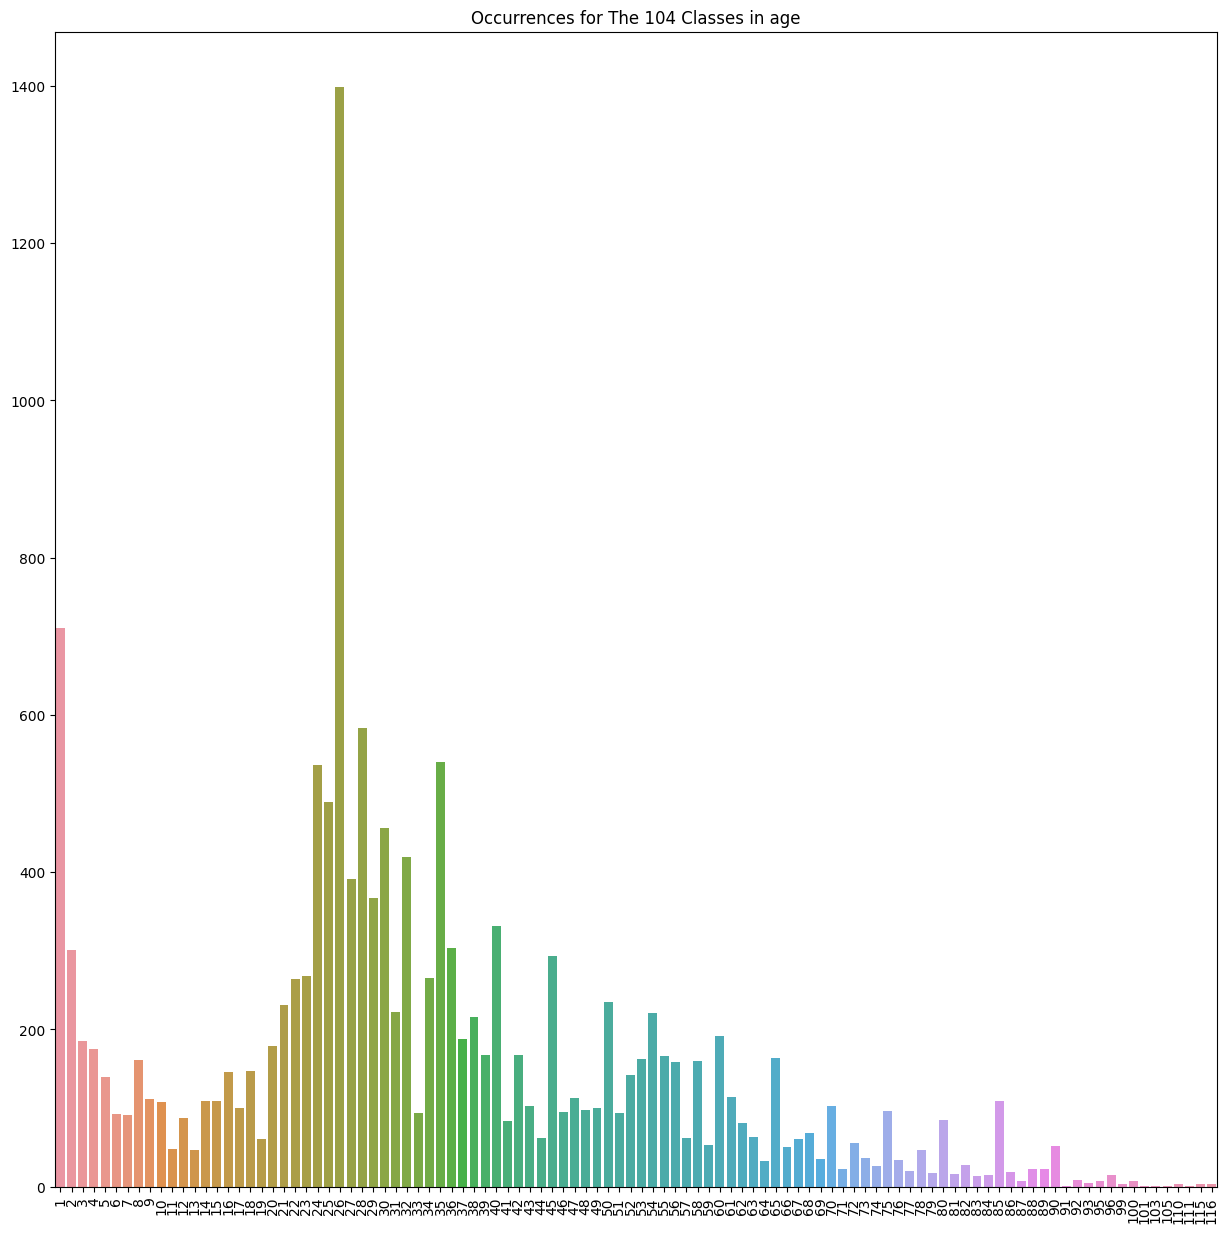

In [6]:
labels, counamts = frequencies(df, 'age')

In [7]:
# Considerando as faixas etarias da população brasileira:
# jovens: 0-19anos
# adultos: 20-59anos
# idosos: 60 ou mais

#ref: https://educador.brasilescola.uol.com.br/estrategias-ensino/faixa-etaria-populacao-brasileira.htm#:~:text=Jovens%20%E2%80%93%20do%20nascimento%20at%C3%A9%20aos,anos%20de%20idade%20ou%20mais.

In [8]:
# criar a nova coluna age_group
df['age_group'] = pd.cut(df['age'], bins=[-1, 19, 59, 150], labels=['0-19', '20-59', '60+'])

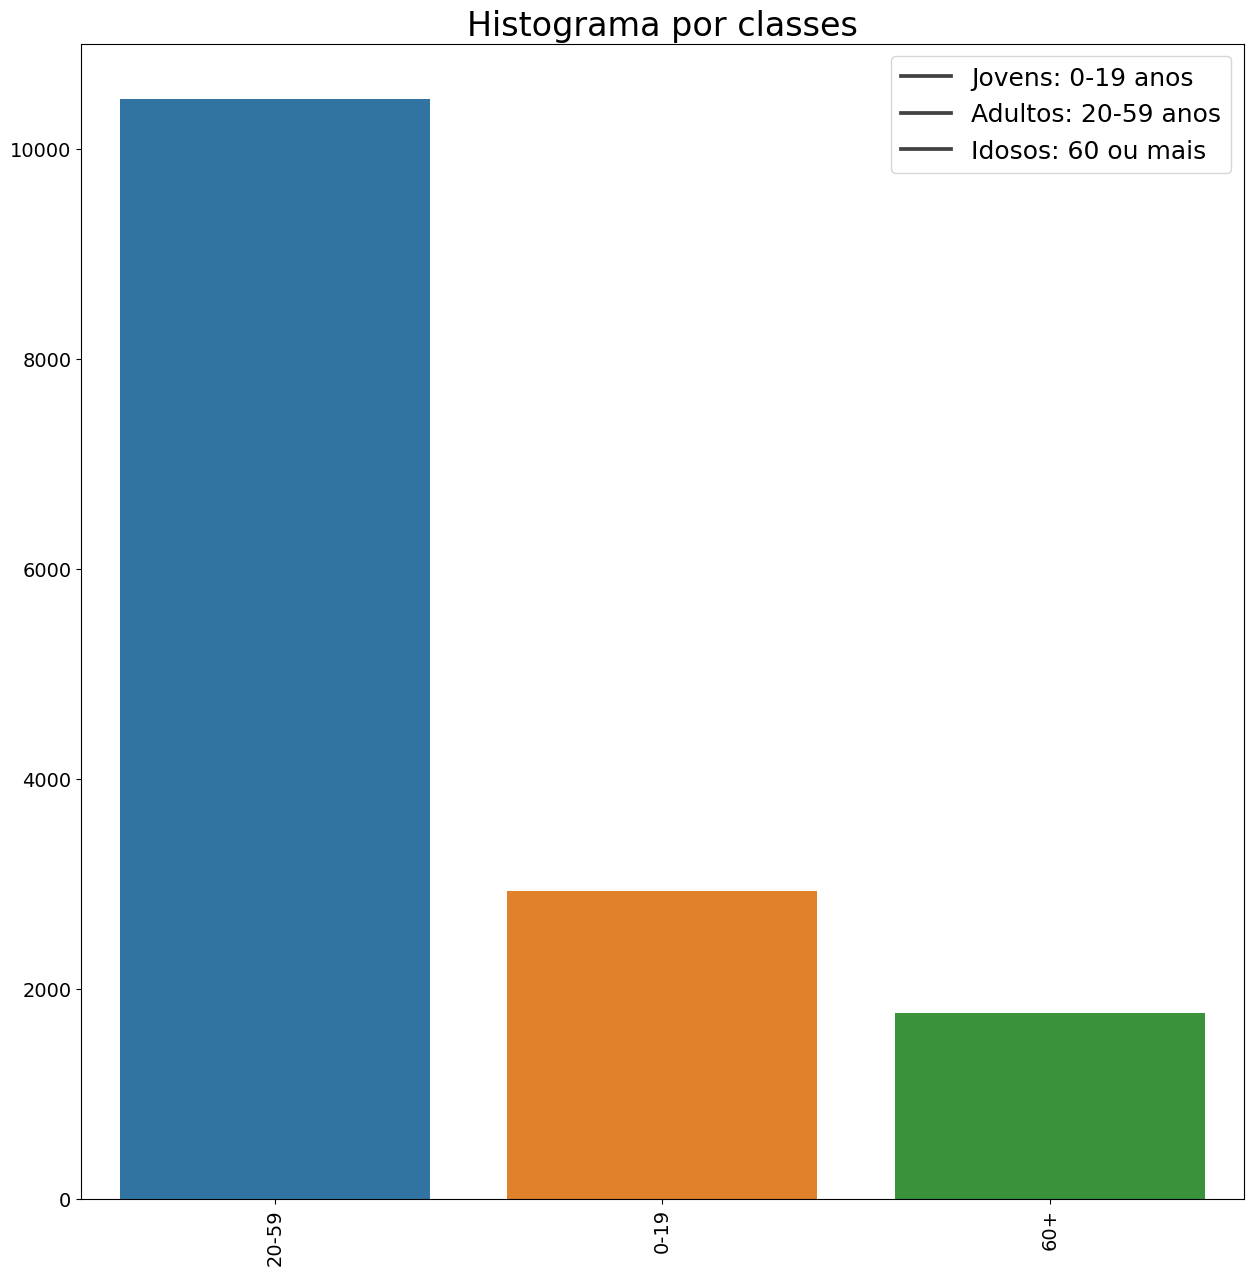

In [11]:
labels, counts = frequencies(df, 'age_group')
plt.rcParams['font.size'] = 18
plt.title('Histograma por classes', fontsize=24)
#plt.xlabel('Eixo X', fontsize=18)


plt.legend(['Jovens: 0-19 anos', 'Adultos: 20-59 anos', 'Idosos: 60 ou mais'])

plt.show()
# jovens: 0-19anos
# adultos: 20-59anos
# idosos: 60 ou mais

In [ ]:
#oversampling
#undersampling
# escolher o balanceamento depois
'''
X = df.drop('age_group', axis=1)
y = df['age_group'] # classes

undersample_strategy = {'0-19': 4000} #amostras

rus = RandomUnderSampler(sampling_strategy=undersample_strategy)
X_res, y_res = rus.fit_resample(X, y)'''

## Carregamento dos dados

Base de dados completa

In [ ]:
#https://drive.google.com/file/d/1XiCC1ooyvm_qkMIbk1kplgAwPEOQ-EfR/view?usp=sharing

!gdown 1XiCC1ooyvm_qkMIbk1kplgAwPEOQ-EfR

In [ ]:
FILE='UTKFace.zip'

In [ ]:
archive = zipfile.ZipFile(FILE, 'r')
archive.extractall()

In [ ]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [ ]:
Img_Size = 224
ref = 'jpg'
notref = 'met'

In [ ]:
X = []
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    Y.append(name)
    #X.append(cv2.imread(name,0))
    X.append(cv2.imread(name))
m = len(Y)
print(n,m)

In [ ]:
'''plt.figure(figsize=(10, 10))
m = len(Y)
for i in range(30):
  ax = plt.subplot(5, 6, i + 1)
  idx = np.random.randint(m)
  RGB_img = cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(Y[idx])
  plt.axis("off")'''

# Dados de Treinamento

In [ ]:
#https://drive.google.com/file/d/1bh_xtlDjJxMabyOXSDaSj-jdYp-WX1tL/view?usp=sharing

!gdown 1bh_xtlDjJxMabyOXSDaSj-jdYp-WX1tL


In [ ]:
df = pd.read_csv('train-utkface.csv')
df.head()

In [ ]:
ref = 'jpg'
notref = 'met'

In [ ]:
X= [] #imagens de treino size 224
Y =[] #idades
n = len(img_name)
k = 0
for name in df.filename:
  if(ref in name):
    try:
      idade = df['age'].iloc[k]
      Y.append(idade)
      #X.append(cv2.imread(name,0))
      img = cv2.imread(name)
      resized_img =cv2.resize(img, (Img_Size,Img_Size))
      X.append(resized_img)
      X.append(img)
    except:
      pass
    k = k + 1
m = len(Y)
print(n,m)

In [ ]:
df

In [ ]:
RGB_img = cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB)
resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
plt.imshow(resized)
plt.title(Y[0])

In [ ]:
  idx = np.random.randint(m)
  RGB_img = cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))

## CNN modelo (baseline)